<a href="https://colab.research.google.com/github/Prashanna-Raj-Pandit/NN-Time-series/blob/main/BitPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Activating GPU

In [1]:
!nvidia-smi

Thu Dec  4 06:13:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Load data

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-12-04 06:13:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2025-12-04 06:13:25 (9.06 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
import pandas as pd
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
print(df.head())

           Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC            123.65499       124.30466       124.75166   
2013-10-02      BTC            125.45500       123.65499       125.75850   
2013-10-03      BTC            108.58483       125.45500       125.66566   
2013-10-04      BTC            118.67466       108.58483       118.67500   
2013-10-05      BTC            121.33866       118.67466       121.93633   

            24h Low (USD)  
Date                       
2013-10-01      122.56349  
2013-10-02      123.63383  
2013-10-03       83.32833  
2013-10-04      107.05816  
2013-10-05      118.00566  


In [4]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000
mean,6529.845141,6513.579485,6710.061683,6302.417386
std,10887.847444,10863.800772,11206.779756,10475.811252
min,108.584830,108.584830,118.675000,83.328330
25%,460.087500,459.400500,469.720995,450.818830
50%,2780.182500,2772.367500,2874.696250,2696.457500
75%,8506.923720,8496.887593,8763.291985,8221.060570
max,63346.789035,63562.673545,64801.787870,62094.632914


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
len(df)

2787

In [7]:
price_df=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
price_df.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0, 0.5, 'Price')

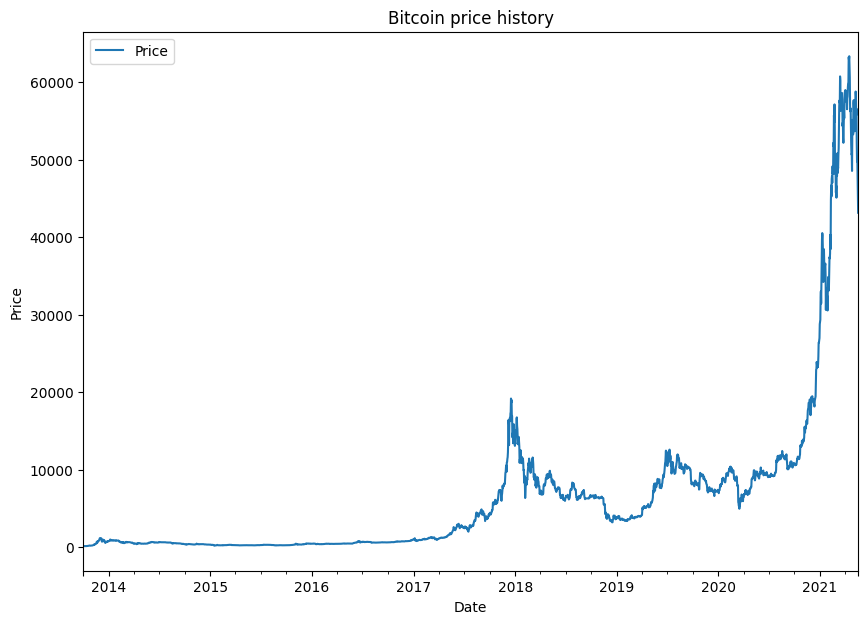

In [8]:
import matplotlib.pyplot as plt
price_df.plot(figsize=(10,7))
plt.title("Bitcoin price history")
plt.ylabel("Price")

## Train/Test split

In [9]:
# get the bitcoin data array
timesteps=price_df.index.to_numpy()
prices=price_df["Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
split_size=int(0.8*len(price_df))
x_train,y_train=timesteps[:split_size],prices[:split_size]
len(x_train),len(y_train)

(2229, 2229)

In [11]:
x_test,y_test=timesteps[split_size:],prices[split_size:]
len(x_test),len(y_test)

(558, 558)

### Visualizing train and test data of timeseries

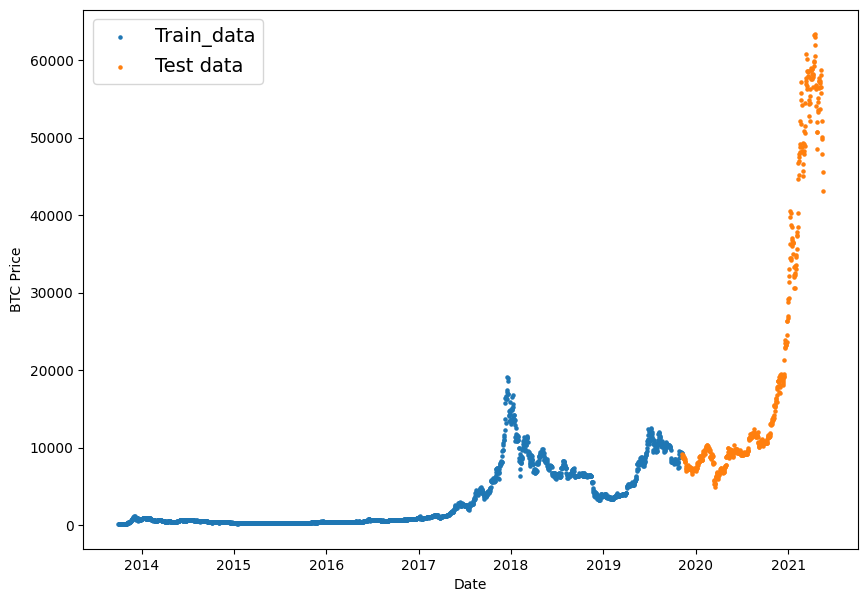

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,s=5,label="Train_data")
plt.scatter(x_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

## Create a plotting function

In [13]:
# A funtion to plot the timeseries data
def plot_time_series(timesteps,values, format=".", start=0,end=None,label=None):
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

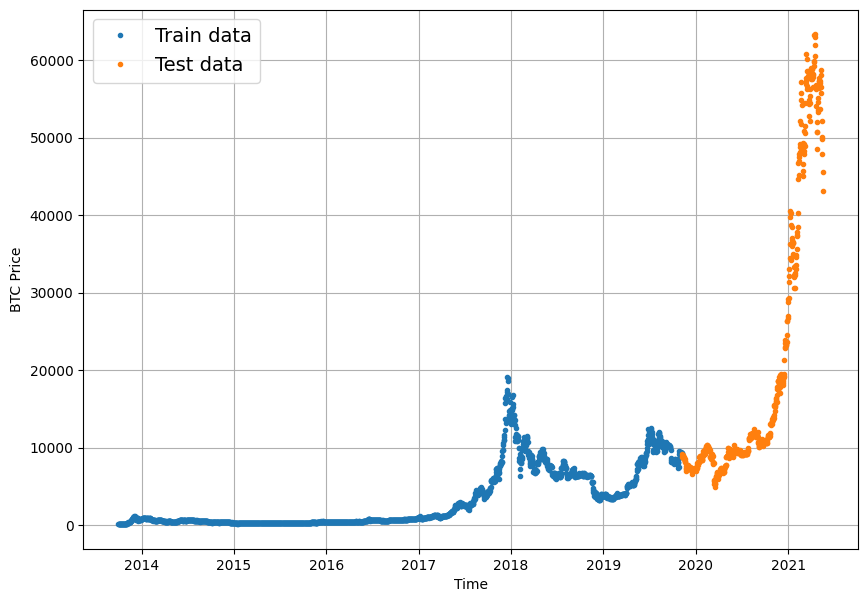

In [14]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_train,values=y_train,label="Train data")
plot_time_series(timesteps=x_test,values=y_test,label="Test data")

# Modeling Experiments

Training on univariate data- only one predictor (prices) is involved in the forcasting



## Naive Model

In [15]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [16]:
x_test[:10]

array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [17]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

In [18]:
import tensorflow as tf

def mean_absolute_scaled_error(y_true,y_pred):
  """
  Implementing MASE assuming no seasonality of data.
  """
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))
  # find the MAE of naive forcast (no seasonality)
  mae_naive_no_seasonality=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_seasonality


In [19]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=y_test[:-1]).numpy()


np.float64(0.9995699939182624)

In [20]:

def evaluate_metrics(y_true,y_pred):
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  mae=tf.keras.metrics.mae(y_true,y_pred)
  mse=tf.keras.metrics.mse(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mape(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)

  return {
      "mae":mae.numpy(),
      "mse":mse.numpy(),
      "rmse":rmse.numpy(),
      "mape":mape.numpy(),
      "mase":mase.numpy()
  }

In [21]:
naive_model_results=evaluate_metrics(y_true=y_test[:-1],y_pred=y_test[1:])
naive_model_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.527042),
 'mase': np.float32(1.0060278)}

Tensorflow Expand_dims concept

In [22]:
import tensorflow as tf

# Create a 2D tensor
x = tf.constant([[1, 2, 3], [4, 5, 6]])
print("Original tensor x:\n", x)
print("Shape of x:", x.shape)

# Expand dimensions at axis 0 (add a new outer dimension)
res_axis_0 = tf.expand_dims(x, 0)
print("\nTensor after expanding dims at axis 0:\n", res_axis_0)
print("Shape of res_axis_0:", res_axis_0.shape) # Shape changes from (2, 3) to (1, 2, 3)

# Expand dimensions at axis 1 (add a new dimension in the middle)
res_axis_1 = tf.expand_dims(x, 1)
print("\nTensor after expanding dims at axis 1:\n", res_axis_1)
print("Shape of res_axis_1:", res_axis_1.shape) # Shape changes from (2, 3) to (2, 1, 3)

# Expand dimensions at axis -1 (add a new inner dimension)
res_axis_neg1 = tf.expand_dims(x, -1)
print("\nTensor after expanding dims at axis -1:\n", res_axis_neg1)
print("Shape of res_axis_neg1:", res_axis_neg1.shape) # Shape changes from (2, 3) to (2, 3, 1)

Original tensor x:
 tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
Shape of x: (2, 3)

Tensor after expanding dims at axis 0:
 tf.Tensor(
[[[1 2 3]
  [4 5 6]]], shape=(1, 2, 3), dtype=int32)
Shape of res_axis_0: (1, 2, 3)

Tensor after expanding dims at axis 1:
 tf.Tensor(
[[[1 2 3]]

 [[4 5 6]]], shape=(2, 1, 3), dtype=int32)
Shape of res_axis_1: (2, 1, 3)

Tensor after expanding dims at axis -1:
 tf.Tensor(
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]], shape=(2, 3, 1), dtype=int32)
Shape of res_axis_neg1: (2, 3, 1)


In [23]:
# lets setup the global variables for the window and horizon
HORIZON=1 # predict next 1 day
WINDOW=7 # use the past one week of bitcoin data


In [24]:
# create function to label windowed data
def get_labeled_window(x,horizon=HORIZON):
  """
  creates labels for the windowed dataset
  eg, if horizon=1
  input:[0,1,2,3,4,5,6,7]-> output: ([0,1,2,3,4,5,6],[7])
  """
  return x[:,:-horizon],x[:,-horizon:]

In [25]:
# test out the window labeling function
test_window, test_label=get_labeled_window(tf.expand_dims(tf.range(8),axis=0))
test_window,test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [26]:
# create function to view NumPy arrays as windows
import numpy as np
def make_windows(x,window_size=WINDOW,horizon=HORIZON):
  """
  Turns a 1D array in to 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # create a window of specific window size (add the horizon on the end for labelling latter)
  window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
  # print("window",window_step)
  # create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T # create 2D array of window of size window size
  # print(f"window indexed: \n{window_indexes, window_indexes.shape}")
  window_array=x[window_indexes]
  print("Window array",window_array)
  window,label=get_labeled_window(window_array,horizon=horizon)
  return window,label

In [27]:
np.expand_dims(np.arange(8),axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [28]:
make_windows(prices,window_size=WINDOW,horizon=HORIZON)

Window array [[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [29]:
len(prices)

2787

In [30]:
# we can also use axis=1 like this.
#starts = np.expand_dims(np.arange(len(x)-(WINDOW+HORIZON-1)), axis=1)

np.expand_dims(np.arange(len(prices)-(WINDOW+HORIZON-1)),axis=0).T

array([[   0],
       [   1],
       [   2],
       ...,
       [2777],
       [2778],
       [2779]])

In [31]:
full_window,full_label=make_windows(prices)
full_window.shape,full_label.shape

Window array [[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


((2780, 7), (2780, 1))

In [32]:
# lets visualize 5 window and labels
for i in range(5):
  print(f"window: {full_window[i]} -> label: {full_label[i]}\n")

window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> label: [123.033]

window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> label: [124.049]

window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> label: [125.96116]

window: [118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116] -> label: [125.27966]

window: [121.33866 120.65533 121.795   123.033   124.049   125.96116 125.27966] -> label: [125.9275]



In [33]:
def make_train_test_split(window,labels,test_split=0.2):
  """
  split matching pairs of windows and labels into train and test splits.
  """
  split_size=int(len(window)*(1-test_split))
  train_windows=window[:split_size]
  train_labels=labels[:split_size]
  test_windows=window[split_size:]
  test_labels=labels[split_size:]

  return train_windows, test_windows,train_labels,test_labels

In [34]:
train_windows,test_window, train_labels,test_labels=make_train_test_split(full_window,full_label)
len(train_windows),len(test_window),len(train_labels),len(test_labels)


(2224, 556, 2224, 556)

In [35]:
test_window[:5],test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [36]:
import os
def create_model_checkpoint(model_name,save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,f"{model_name}.keras"),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense Model (window=7, horizon=1)

In [37]:
train_windows

array([[ 123.65499   ,  125.455     ,  108.58483   , ...,  121.33866   ,
         120.65533   ,  121.795     ],
       [ 125.455     ,  108.58483   ,  118.67466   , ...,  120.65533   ,
         121.795     ,  123.033     ],
       [ 108.58483   ,  118.67466   ,  121.33866   , ...,  121.795     ,
         123.033     ,  124.049     ],
       ...,
       [9225.99547934, 9131.41063031, 9197.63234462, ..., 9202.41545055,
        9369.62808116, 9326.59962378],
       [9131.41063031, 9197.63234462, 9290.89660239, ..., 9369.62808116,
        9326.59962378, 9335.75240233],
       [9197.63234462, 9290.89660239, 9202.41545055, ..., 9326.59962378,
        9335.75240233, 9226.48582088]])

In [38]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1=tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON,activation="linear")# linear activation means no activation
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_window,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 3153.4946 - mae: 3153.4946 - mse: 25548168.0000 - val_loss: 2146.9536 - val_mae: 2146.9536 - val_mse: 10437182.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 390.5735 - mae: 390.5735 - mse: 572299.4375 - val_loss: 1512.1987 - val_mae: 1512.1987 - val_mse: 5743773.5000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 261.2605 - mae: 261.2605 - mse: 285428.5938 - val_loss: 1023.7089 - val_mae: 1023.7089 - val_mse: 3534497.2500
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 184.7827 - mae: 184.7827 - mse: 172957.2812 - val_loss: 1003.6782 - val_mae: 1003.6782 - val_mse: 3312766.5000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 174.6192 - mae: 174.6192 - mse: 161257.8281 - val_loss: 1028.4698 - val_mae: 1028.4698 - val_mse: 3289576.2500
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 172.2614 - mae: 172.2614 - mse: 155166.1562 - val_loss: 1000.6552 - val_mae: 1000.

In [39]:
model_1.evaluate(test_window,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 284.0184 - mae: 284.0184 - mse: 345484.6250


[568.1781616210938, 568.1781616210938, 1167894.5]

In [40]:
# Making forecast with model (on the test dataset)

def make_preds(model,input_data):
  # make prediction on the given model and the input dataset
  forecast=model.predict(input_data)
  return tf.squeeze(forecast)

In [41]:
# model evaluation

model_1_preds=make_preds(model=model_1,input_data=test_window)
len(model_1_preds)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


556

In [42]:
model_1_results=evaluate_metrics(y_true=tf.squeeze(test_labels),y_pred=model_1_preds)
model_1_results

{'mae': np.float32(568.1781),
 'mse': np.float32(1167894.5),
 'rmse': np.float32(1080.6917),
 'mape': np.float32(2.5450826),
 'mase': np.float32(0.9981316)}

In [43]:
naive_model_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.527042),
 'mase': np.float32(1.0060278)}

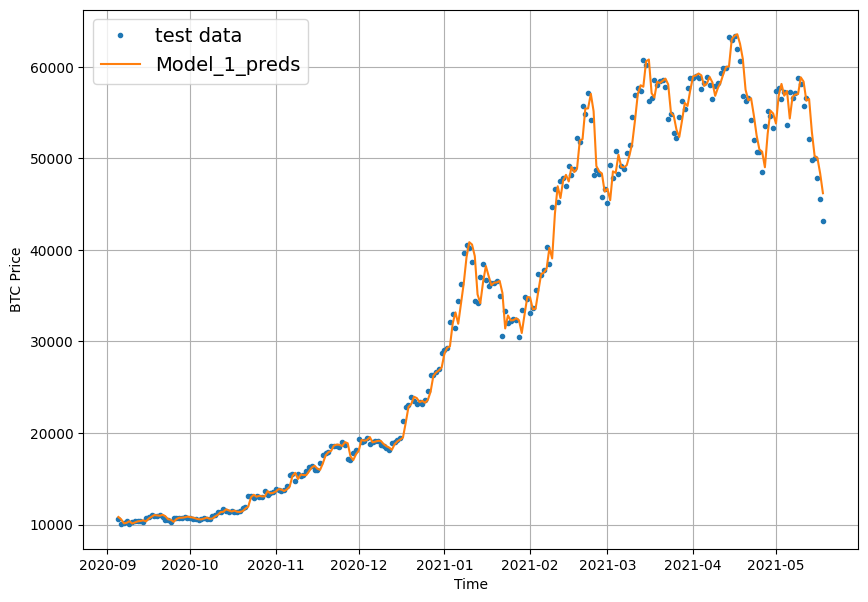

In [44]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_window):],values=test_labels[:,0],start=offset,label="test data")
plot_time_series(timesteps=x_test[-len(test_window):],values=model_1_preds,start=offset,label="Model_1_preds",format="-")


In [45]:
HORIZON=1
WINDOW=30

In [46]:
# make window data
full_window,full_labels=make_windows(x=prices,window_size=WINDOW,horizon=HORIZON)

Window array [[  123.65499      125.455        108.58483    ...   192.75666
    197.4          196.02499   ]
 [  125.455        108.58483      118.67466    ...   197.4
    196.02499      198.04883   ]
 [  108.58483      118.67466      121.33866    ...   196.02499
    198.04883      198.93233   ]
 ...
 [63346.78903511 61965.7825981  60574.44472823 ... 49764.1320816
  50032.69313676 47885.62525472]
 [61965.7825981  60574.44472823 56850.83016569 ... 50032.69313676
  47885.62525472 45604.61575361]
 [60574.44472823 56850.83016569 56224.10158771 ... 47885.62525472
  45604.61575361 43144.47129086]]


In [47]:
len(full_window),len(full_labels)

(2757, 2757)

In [48]:
train_windows,test_windows,train_labels,test_labels=make_train_test_split(window=full_window,labels=full_labels,test_split=0.2)

In [49]:
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2205, 552, 2205, 552)

In [50]:
train_windows[:2],train_labels[:2]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499]]),
 array([[196.02499],
        [198.04883]]))

In [51]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(HORIZON,activation='linear')
],name="Model_2_dense"
)
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                )
model_2.fit(train_windows,train_labels,
            validation_data=(test_windows,test_labels),
            epochs=128,
            verbose=0,
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [52]:
model_2.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 310.8473 


614.4893188476562

In [53]:
model_2_loaded=tf.keras.models.load_model("model_experiments/Model_2_dense.keras")
model_2_eval=model_2_loaded.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 294.9684


In [54]:
model_2_preds=make_preds(model_2_loaded,test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [55]:
model_2_results=evaluate_metrics(tf.squeeze(test_labels),model_2_preds)
model_2_results

{'mae': np.float32(584.3233),
 'mse': np.float32(1177528.8),
 'rmse': np.float32(1085.14),
 'mape': np.float32(2.645563),
 'mase': np.float32(1.0214028)}

In [56]:
model_1_results

{'mae': np.float32(568.1781),
 'mse': np.float32(1167894.5),
 'rmse': np.float32(1080.6917),
 'mape': np.float32(2.5450826),
 'mase': np.float32(0.9981316)}

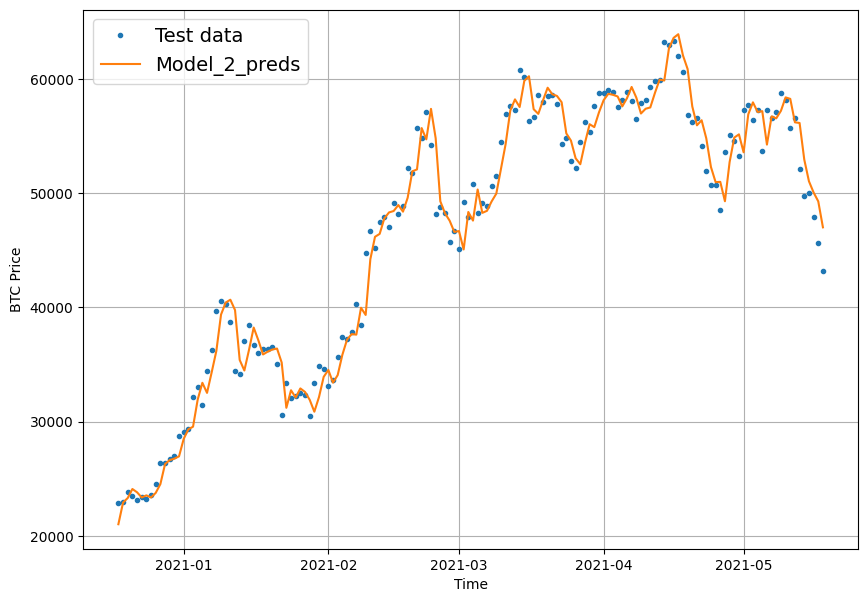

In [57]:
offset=400
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test data")
plot_time_series(timesteps=x_test[-len(test_windows):],values=model_2_preds,start=offset,label="Model_2_preds",format="-")

MODEL 3

In [58]:
WINDOW=30
HORIZON=7
full_windows,full_labels=make_windows(prices,window_size=WINDOW,horizon=HORIZON)

Window array [[  123.65499      125.455        108.58483    ...   210.3075
    225.02         248.25333   ]
 [  125.455        108.58483      118.67466    ...   225.02
    248.25333      262.32666   ]
 [  108.58483      118.67466      121.33866    ...   248.25333
    262.32666      294.48699   ]
 ...
 [58171.9090187  59295.95004401 59822.90167743 ... 49764.1320816
  50032.69313676 47885.62525472]
 [59295.95004401 59822.90167743 59853.19724227 ... 50032.69313676
  47885.62525472 45604.61575361]
 [59822.90167743 59853.19724227 63223.88439079 ... 47885.62525472
  45604.61575361 43144.47129086]]


In [59]:
full_windows.shape,full_labels.shape


((2751, 30), (2751, 7))

In [60]:
train_windows,test_windows,train_labels,test_labels=make_train_test_split(window=full_windows,labels=full_labels,test_split=0.2)

In [61]:
train_windows.shape,test_windows.shape,train_labels.shape,test_labels.shape

((2200, 30), (551, 30), (2200, 7), (551, 7))

In [62]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(HORIZON)
],name="Model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,train_labels,
            epochs=128,
            validation_data=(test_windows,test_labels),
            batch_size=128,
            verbose=1,
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 1867.2506 - val_loss: 3004.8098
Epoch 2/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 587.1121 - val_loss: 2218.3191
Epoch 3/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 421.5674 - val_loss: 2085.9348
Epoch 4/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 376.0730 - val_loss: 1808.6274
Epoch 5/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 342.0768 - val_loss: 1618.8560
Epoch 6/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 323.9398 - val_loss: 1582.7600
Epoch 7/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 313.7306 - val_loss: 1506.9462
Epoch 8/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 304.9315 - val_loss: 1497.2362
Epoch 9/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 296.9351 - val_loss: 1500.7513
Epoch 10/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 296.1356 - val_loss: 1484.9799
Epoch 11/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 288.7710 - val_loss: 1441.7299
Epoch 

In [63]:
model_3.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 620.4862


1217.8145751953125

In [64]:
model_3_loaded=tf.keras.models.load_model("model_experiments/Model_3_dense.keras")

In [65]:
model_3_loaded.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 611.4052


1206.1357421875

In [66]:
model_3_preds=make_preds(model_3_loaded,test_windows)
model_3_preds

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


<tf.Tensor: shape=(551, 7), dtype=float32, numpy=
array([[ 9466.325,  9574.824,  9228.561, ...,  9315.349,  9551.739,
         9395.211],
       [ 9229.878,  9086.605,  8889.693, ...,  9108.926,  9266.046,
         8977.932],
       [ 8813.07 ,  8713.128,  8777.374, ...,  9027.594,  9112.727,
         8763.342],
       ...,
       [58825.33 , 58923.188, 58413.332, ..., 58922.28 , 58883.07 ,
        58900.207],
       [58897.008, 59974.594, 57957.562, ..., 57745.836, 60460.83 ,
        58534.01 ],
       [57396.2  , 57746.1  , 56498.094, ..., 58129.973, 57383.758,
        56716.06 ]], dtype=float32)>

In [67]:
model_3_preds.shape,model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [68]:

def evaluate_metrics(y_true,y_pred):
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  mae=tf.keras.metrics.mae(y_true,y_pred)
  mse=tf.keras.metrics.mse(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mape(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)
  if mae.ndim>0:
    mae=tf.reduce_mean(mae)
    mse=tf.reduce_mean(mse)
    mape=tf.reduce_mean(mape)
    rmse=tf.reduce_mean(rmse)
    mase=tf.reduce_mean(mase)


  return {
      "mae":mae.numpy(),
      "mse":mse.numpy(),
      "rmse":rmse.numpy(),
      "mape":mape.numpy(),
      "mase":mase.numpy()
  }

In [69]:
model_3_results=evaluate_metrics(y_true=tf.squeeze(test_labels),y_pred=model_3_preds)
model_3_results

{'mae': np.float32(1206.1356),
 'mse': np.float32(5143634.5),
 'rmse': np.float32(1393.0393),
 'mape': np.float32(5.4538317),
 'mase': np.float32(2.146251)}

In [70]:
test_labels.shape

(551, 7)

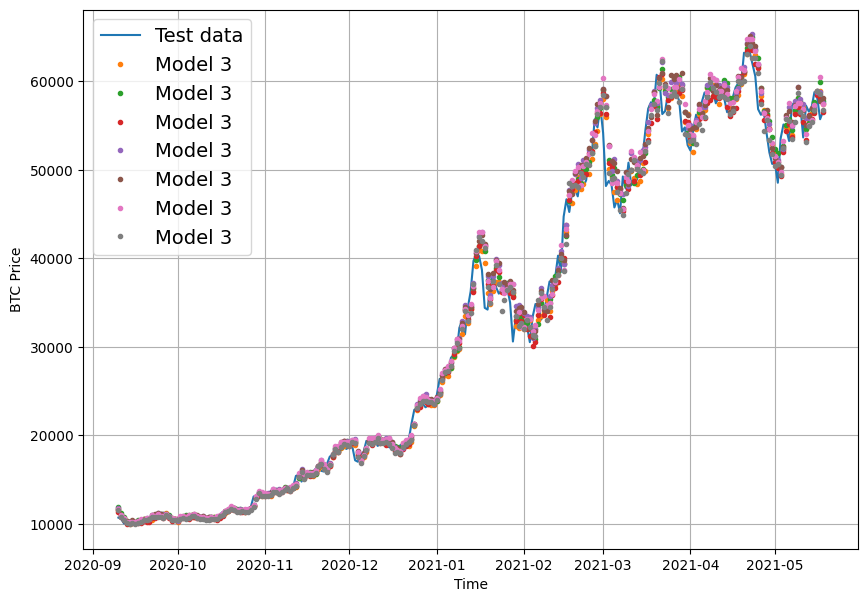

In [71]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_windows):],values=test_labels[:,0],start=offset,format="-",label="Test data")
plot_time_series(timesteps=x_test[-len(test_windows):],values=model_3_preds,start=offset,label="Model 3")

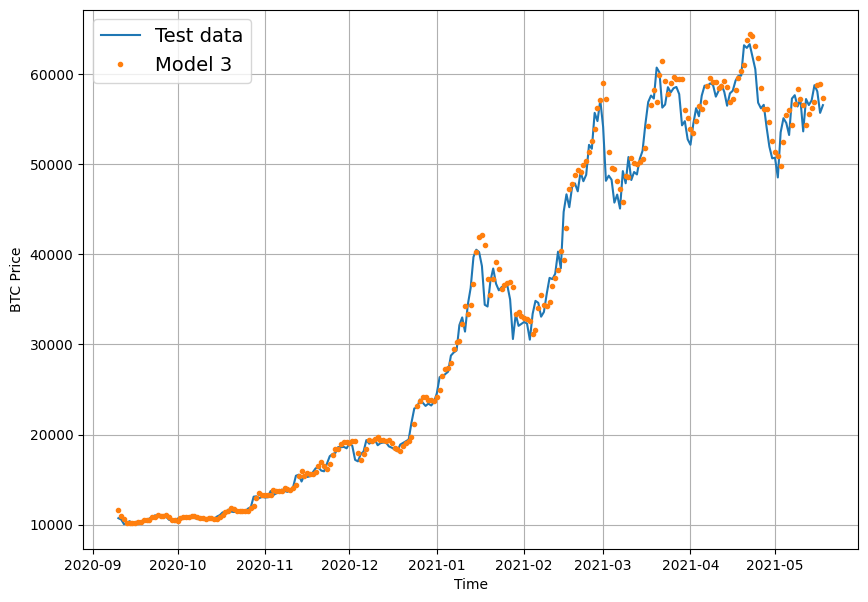

In [72]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_windows):],values=test_labels[:,0],start=offset,format="-",label="Test data")
plot_time_series(timesteps=x_test[-len(test_windows):],values=tf.reduce_mean(model_3_preds,axis=1),start=offset,label="Model 3")

In [73]:
import pandas as pd
df=pd.DataFrame({"Naive":[naive_model_results['mae']],
                "Model 1":[model_1_results['mae']],
                "Model 2":[model_2_results['mae']],
                "Model 3":[model_3_results['mae']]}
                )

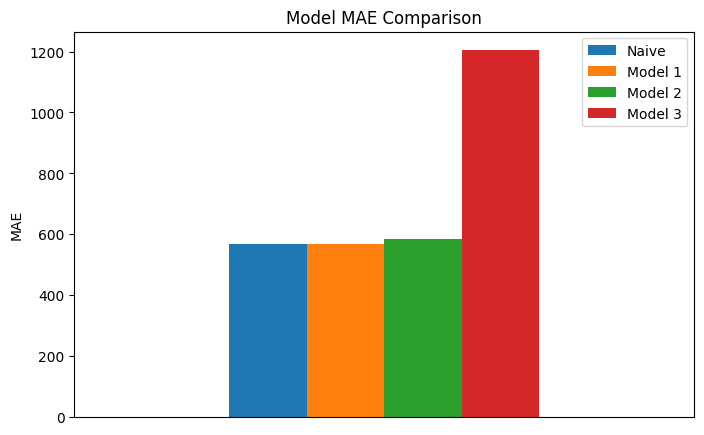

In [74]:
import matplotlib.pyplot as plt

df.plot(kind='bar', figsize=(8,5))
plt.title("Model MAE Comparison")
plt.ylabel("MAE")
plt.xticks([])  # Remove index label (0)
plt.show()


# MODEL 4:

In [75]:
HORIZON=1
WINDOW=7

In [76]:
#create a full dataset
full_windows,full_labels=make_windows(prices,window_size=WINDOW,horizon=HORIZON)

Window array [[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


In [77]:
full_windows.shape,full_labels.shape

((2780, 7), (2780, 1))

In [78]:
train_windows,test_windows,train_labels,test_labels=make_train_test_split(window=full_windows,labels=full_labels,test_split=0.2)
train_windows.shape,test_windows.shape,train_labels.shape,test_labels.shape

((2224, 7), (556, 7), (2224, 1), (556, 1))

In [79]:
# Conv1D takes the data in the shape of (batch_size, timesteps, input_dims)
# Reshaping our data
x=tf.constant(train_windows[0])
expand_dims_layer=layers.Lambda(lambda x:tf.expand_dims(x,axis=1)) # Lambda layer
x.shape,expand_dims_layer(x).shape

(TensorShape([7]), TensorShape([7, 1]))

In [80]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    # create a lambda layer to reshape the input dims
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters=32,kernel_size=3,padding="causal",activation="relu"),
    layers.Dense(HORIZON)
],name="Model_4_Conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,train_labels,
            validation_data=(test_windows,test_labels),
            epochs=128,
            batch_size=32,
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1699.0652 - val_loss: 1121.0764
Epoch 2/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 183.1302 - val_loss: 995.5589
Epoch 3/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 167.1249 - val_loss: 953.1702
Epoch 4/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 163.9979 - val_loss: 932.4720
Epoch 5/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 162.7493 - val_loss: 922.7358
Epoch 6/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 161.5686 - val_loss: 916.0380
Epoch 7/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 161.9819 - val_loss: 908.9474
Epoch 8/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 160.3521 - val_loss: 895.9180
Epoch 9/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 159.2486 - val_loss: 863.3391
Epoch 10/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 154.3806 - val_loss: 854.9631
Epoch 11/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 152.9251 - val_loss: 827.3662
Epoch 12/128
70/

In [81]:
model_4.summary()

Model: "Model_4_Conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 1, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1, 32)          │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1, 1)           │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,213 (8.65 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,476 (5.77 KB)

In [82]:
model_4.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 287.5586 


581.5001220703125

In [83]:
model_4_preds=make_preds(model_4,test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [84]:
model_4_results=evaluate_metrics(y_true=tf.squeeze(test_labels),y_pred=model_4_preds)
model_4_results

{'mae': np.float32(581.5002),
 'mse': np.float32(1188448.5),
 'rmse': np.float32(1090.1598),
 'mape': np.float32(2.578869),
 'mase': np.float32(1.0215348)}

In [85]:
model_2_results

{'mae': np.float32(584.3233),
 'mse': np.float32(1177528.8),
 'rmse': np.float32(1085.14),
 'mape': np.float32(2.645563),
 'mase': np.float32(1.0214028)}

# MODEL 5: LSTM

In [86]:
tf.random.set_seed(42)

inputs=layers.Input(shape=(WINDOW,))
x=layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)
print("x.shape",x.shape)
x=layers.LSTM(64,activation="relu")(x)
output=layers.Dense(HORIZON)(x)
model_5=tf.keras.Model(inputs=inputs,outputs=output,name="Model_5_LSTM")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                )

model_5.fit(train_windows,train_labels,
            validation_data=(test_windows,test_labels),
            epochs=128,
            batch_size=32,
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

x.shape (None, 1, 7)
Epoch 1/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3120.5391 - val_loss: 1557.6570
Epoch 2/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 200.7416 - val_loss: 926.0797
Epoch 3/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 163.5067 - val_loss: 906.3167
Epoch 4/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 160.8194 - val_loss: 888.2416
Epoch 5/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 158.2542 - val_loss: 872.9066
Epoch 6/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 154.8799 - val_loss: 856.1122
Epoch 7/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 153.4035 - val_loss: 848.7700
Epoch 8/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 150.5899 - val_loss: 819.1282
Epoch 9/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 147.4678 - val_loss: 803.3445
Epoch 10/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 253.4473 - val_loss: 791.8466
Epoch 11/128
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 141.9944 - val_loss: 781.

In [87]:
model_5.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 283.3013 


571.4288330078125

In [88]:
model_5_preds=make_preds(model_5,test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [89]:
model_5_results=evaluate_metrics(y_true=tf.squeeze(test_labels),y_pred=model_5_preds)
model_5_results

{'mae': np.float32(571.4288),
 'mse': np.float32(1171275.9),
 'rmse': np.float32(1082.255),
 'mape': np.float32(2.5392847),
 'mase': np.float32(1.0038421)}

In [90]:
naive_model_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.527042),
 'mase': np.float32(1.0060278)}

# Creating Multivariate data

Addding Bitcoin block reward size

In [91]:
block_reward_1=50
block_reward_2=25
block_reward_3=12.5
block_reward_4=6.25

# Block reward dates
block_reward_2_date=np.datetime64("2012-11-28")
block_reward_3_date=np.datetime64("2016-07-09")
block_reward_4_date=np.datetime64("2020-05-11")



In [92]:
price_df.index[0]

Timestamp('2013-10-01 00:00:00')

In [93]:
block_reward_2_days=(block_reward_3_date-price_df.index[0]).days
block_reward_3_days=(block_reward_4_date-price_df.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2414)

In [94]:
# add block reward column
price_df_with_block=price_df.copy()
price_df_with_block["block_reward"]=None

price_df_with_block.iloc[:block_reward_2_days,-1]=block_reward_2
price_df_with_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3
price_df_with_block.iloc[block_reward_3_days:,-1]=block_reward_4
price_df_with_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


<Axes: xlabel='Date'>

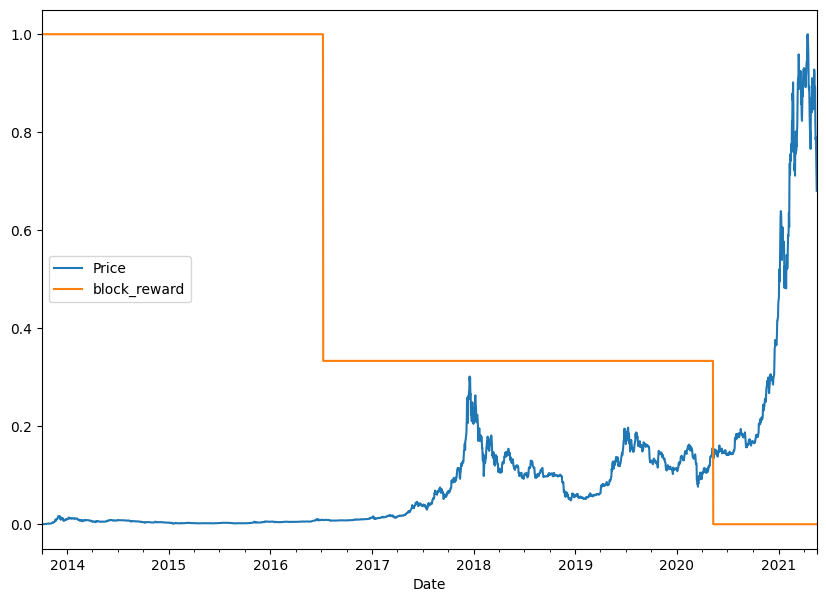

In [95]:
# plot the df
from sklearn.preprocessing import minmax_scale
scaled_price_block_df=pd.DataFrame(minmax_scale(price_df_with_block[["Price","block_reward"]]),
                                   columns=price_df_with_block.columns,
                                   index=price_df_with_block.index)
scaled_price_block_df.plot(figsize=(10,7))

## Creating windows dataset with pandas

In [96]:
WINDOWS=7
HORIZON=1


In [97]:
new_price_df=price_df_with_block.copy()
# add windowd columns
for i in range(WINDOWS):
  new_price_df[f"Price+{i+1}"]=new_price_df["Price"].shift(periods=i+1)
new_price_df.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [98]:
new_price_df.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


Window for a week (7) to predict a horizon of 1 (multivariate time series)
WINDOW_SIZE & block_reward -> HORIZON

[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]

[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]

[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]


In [99]:
# Lets create the X and y, remove the NaN and convert to float32 to prevent Tensorflow errors
X=new_price_df.dropna().drop("Price",axis=1).astype(np.float32)
y=new_price_df.dropna()["Price"].astype(np.float32)

In [100]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [101]:
y.head()

,Price
Date,
2013-10-08,123.032997
2013-10-09,124.049004
2013-10-10,125.961159
2013-10-11,125.279663
2013-10-12,125.927498


In [102]:
split_size=int(len(new_price_df)*0.8)
X_train=X[:split_size]
X_test=X[split_size:]
y_train=y[:split_size]
y_test=y[split_size:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229, 8), (551, 8), (2229,), (551,))

In [103]:
X_train

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661
...,...,...,...,...,...,...,...,...
2019-11-10,12.5,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930,9202.415039,9290.896484
2019-11-11,12.5,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930,9202.415039
2019-11-12,12.5,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930


In [104]:
X_train_values=X_train.values
y_train_values=y_train.values

In [105]:
X_train_values

array([[  25.     ,  121.795  ,  120.65533, ...,  108.58483,  125.455  ,
         123.65499],
       [  25.     ,  123.033  ,  121.795  , ...,  118.67466,  108.58483,
         125.455  ],
       [  25.     ,  124.049  ,  123.033  , ...,  121.33866,  118.67466,
         108.58483],
       ...,
       [  12.5    , 9081.187  , 8798.042  , ..., 9335.752  , 9326.6    ,
        9369.628  ],
       [  12.5    , 8711.534  , 9081.187  , ..., 9226.485  , 9335.752  ,
        9326.6    ],
       [  12.5    , 8760.893  , 8711.534  , ..., 8794.358  , 9226.485  ,
        9335.752  ]], dtype=float32)

In [106]:
y_train_values

array([ 123.033  ,  124.049  ,  125.96116, ..., 8711.534  , 8760.893  ,
       8749.5205 ], dtype=float32)

# Model 6: Multivariate timeseries

In [107]:
import tensorflow as tf
tf.random.set_seed(42)
model_6=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_6_conv_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_6.fit(X_train_values,y_train_values,
            epochs=128,
            batch_size=128,
            verbose=0,
            validation_data=(X_test.values,y_test.values),
            callbacks=[create_model_checkpoint(model_name=model_6.name)]
            )

In [108]:
model_6.evaluate(X_test.values,y_test.values)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 302.0939 - mae: 302.0939


[601.6080322265625, 601.6080322265625]

In [109]:
model_6_preds=tf.squeeze(model_6.predict(X_test.values))
model_6_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8657.667 , 8568.351 , 8454.384 , 8362.053 , 8449.187 , 8166.1484,
       8023.521 , 7987.4346, 7566.801 , 7194.833 ], dtype=float32)>

In [110]:
y_test.shape,model_6_preds.shape

((551,), TensorShape([551]))

In [111]:
# Convert to Tensors first
y_true_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)
y_pred_tensor = tf.convert_to_tensor(model_6_preds, dtype=tf.float32)

# Now pass the Tensors to the function
model_6_result = evaluate_metrics(y_true_tensor, y_pred_tensor)
model_6_result


{'mae': np.float32(601.60803),
 'mse': np.float32(1216223.5),
 'rmse': np.float32(1102.8252),
 'mape': np.float32(2.6954799),
 'mase': np.float32(1.0500164)}

In [112]:
model_1_results

{'mae': np.float32(568.1781),
 'mse': np.float32(1167894.5),
 'rmse': np.float32(1080.6917),
 'mape': np.float32(2.5450826),
 'mase': np.float32(0.9981316)}

# Model 7: N-BEATS algorithm

Replicating the model architecture of N-BEATS paper

## Block Layer

suppose:

input_size = 10

horizon = 3

theta_size = 13  (input_size + horizon)

Then theta looks like this:

|--- 10 elements (backcast) ---|--- 3 elements (forecast) ---|


In [113]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,input_size:int,theta_size: int,horizon:int,n_neurons:int,n_layers:int,**kwargs):
    super().__init__(**kwargs)
    self.input_size=input_size
    self.theta_size=theta_size
    self.horizon=horizon
    self.n_neurons=n_neurons
    self.n_layers=n_layers

    # create 4 fully stackable fully connnected layer
    self.hidden=[tf.keras.layers.Dense(n_neurons) for _ in range(n_layers)]
    # output of block is theta layer with linear activation
    self.theta_layer=tf.keras.layers.Dense(theta_size,activation="linear",name="theta_layer")

  def call(self,inputs):
    x=inputs
    for layer in self.hidden:
      x=layer(x)
    theta=self.theta_layer(x)

    # output the backcast and forecast from theta
    backcast,forecast=theta[:,:self.input_size],theta[:,-self.horizon:]
    return backcast,forecast

In [114]:
# set up dummy layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer=NBeatsBlock(input_size=WINDOW,theta_size=WINDOW+HORIZON,
                                     horizon=HORIZON,
                                     n_neurons=128,
                                     n_layers=4)

In [115]:
# create dummy inputs (have to be same size as input size)
dummy_inputs=tf.expand_dims(tf.range(WINDOW)+HORIZON,axis=0)
dummy_inputs


<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [116]:
# Pass dummy inputs
backcast,forecast=dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")


Backcast: [-3.0843651  0.8384206 -0.7878692  0.7618644 -1.5923076  2.6315541
 -2.3795798]
Forecast: -0.7563384175300598


### Creating dataset for the N-BEATS algo

In [117]:
WINDOW=7
HORIZON=1

In [118]:
price_df.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [119]:
price_df_nbeats=price_df.copy()
for i in range(WINDOW):
  price_df_nbeats[f"Price+{i+1}"]=price_df_nbeats["Price"].shift(periods=i+1)
price_df_nbeats.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [120]:
# Make feature and labels
X=price_df_nbeats.dropna().drop("Price",axis=1)
y=price_df_nbeats.dropna()['Price']

# Make train and test sets
split_size=int(len(X)*0.8)
X_train,X_test=X[:split_size],X[split_size:]
y_train,y_test=y[:split_size],y[split_size:]
len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

In [121]:
# 1. Turn train and test array into Tensor Datasets
train_features_dataset=tf.data.Dataset.from_tensor_slices(X_train)
test_features_dataset=tf.data.Dataset.from_tensor_slices(X_test)

train_labels_dataset=tf.data.Dataset.from_tensor_slices(y_train)
test_labels_dataset=tf.data.Dataset.from_tensor_slices(y_test)

# 2. combine features and labels

train_dataset=tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset=tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

# 3. Batch and Prefetch for optimal performance

BATCH_SIZE= 1024
train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [122]:
# setting upthe hyperparmeters for the N-BEATS algorithm
N_EPOCHS=5000
N_NEURONS=512
N_LAYERS=4
N_STACKS=30
INPUT_SIZE=WINDOW*HORIZON
THETA_SIZE=INPUT_SIZE+HORIZON
INPUT_SIZE,THETA_SIZE

(7, 8)

### Getting ready for the residual connections

A residual connection (also called skip connections) involves a deeper neural network layer receiving the outputs as well as the inputs of a shallower neural network layer.

In the case of N-BEATS, the architecture uses residual connections which:

Subtract the backcast outputs from a previous block from the backcast inputs to the current block
Add the forecast outputs from all blocks together in a stack

In [123]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [124]:
tf.random.set_seed(42)
# 1. setup and instance of N-BEATS block
n_beats_block_layer=NBeatsBlock(input_size=INPUT_SIZE,theta_size=THETA_SIZE,horizon=HORIZON,n_neurons=N_NEURONS,n_layers=N_LAYERS,
                                name="Initial_block")

# 2. create an input to stack
stack_input=layers.Input(shape=(INPUT_SIZE,),name="stack_input")

# 3. create initial backcast and forecast input (backwards prediction + horizon prediction)
residual,forecast=n_beats_block_layer(stack_input) # first stack

# 4.create stack of block layers
for i, _ in enumerate(range(N_STACKS-1)):
  # 5. use the NBeatsBlocks to calculate the backcast as well as the forecast
  backcast,block_forecast=NBeatsBlock(input_size=INPUT_SIZE,
                                      theta_size=THETA_SIZE,
                                      horizon=HORIZON,
                                      n_neurons=N_NEURONS,
                                      n_layers=N_LAYERS,
                                      name=f"NBeats_Block_{i}")(residual)

  # 6. create the double residual stacking
  residual=layers.subtract([residual,backcast], name=f"subtract_{i}")
  forecast=layers.add([forecast,block_forecast],name=f"add_{i}")

# 7. Put the stack model together
model_7=tf.keras.Model(inputs=stack_input,outputs=forecast, name="Model_7_nbeats")
 #8. compile the model
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                )
# 9. Fit the model with callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=200,
                                                            verbose=1)])





Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - loss: 45801.5469 - val_loss: 909773963264.0000 - learning_rate: 0.0010
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 77412810752.0000 - val_loss: 83723784.0000 - learning_rate: 0.0010
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 15914728.0000 - val_loss: 3771328768.0000 - learning_rate: 0.0010
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1349061760.0000 - val_loss: 3242970880.0000 - learning_rate: 0.0010
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 13802160128.0000 - val_loss: 5811057721344.0000 - learning_rate: 0.0010
Epoch 6/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 1553890410496.0000 - val_loss: 818588487254016.0000 - learning_rate: 0.0010
Epoch 7/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1338183899938816.0000 - val_loss: 19818306600960.0000 - learning_rate: 0.0010
Epoch 8/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2484137885696.0000 - val_loss: 73785

In [125]:
for x, y in test_dataset.take(1):
    print("Model output shape:", model_7(x).shape)
    print("Label shape:", y.shape)


Model output shape: (556, 1)
Label shape: (556,)


In [126]:
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 83723784.0000


83723784.0

In [127]:
model_7_preds=make_preds(model_7,test_dataset)
model_7_preds[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([38420668., 39135812., 39210072., 37280268., 38174336., 37916464.,
       36668848., 37052964., 36919140., 36633964.], dtype=float32)>

In [128]:
model_7_results=evaluate_metrics(y_true=y_test,y_pred=model_7_preds)
model_7_results

{'mae': np.float32(83723780.0),
 'mse': np.float32(1.2384518e+16),
 'rmse': np.float32(111285750.0),
 'mape': np.float32(418774.38),
 'mase': np.float32(147079.48)}

In [129]:
from tensorflow.keras.utils import plot_model
plot_model(model_7, show_shapes=True, expand_nested=True)


# Model 8: Creating an ensemble (stacking different models together)



In [130]:
HORIZON,WINDOW

(1, 7)

In [131]:
# constructing and fitting ensemble of methods (using differnent loss function)
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fn=["mae","mse","mape"]):
  """
  It returns the num_iter models each trained on each loss function. which means
  10 models trained on each loss (3) resulting 30 models
  """
  ensemble_models=[]
  for i in range(num_iter):
    for loss in loss_fn:
      model=tf.keras.Sequential([
          layers.Dense(128, kernel_initializer="he_normal",activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal",activation="relu"),
          layers.Dense(horizon)
      ])
      model.compile(loss=loss,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae","mse"])

      model.fit(train_data,
                validation_data=test_data,
                epochs=num_epochs,
                verbose=0,
                callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                     patience=200,
                                                     restore_best_weights=True),
                    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                         patience=100,
                                                         factor=0.1,
                                                         verbose=1)
                ])
      ensemble_models.append(model)

  return ensemble_models


In [132]:
# getting list of trained ensemble models
ensemble_models=get_ensemble_models(num_epochs=100,
                                    num_iter=5)
ensemble_models

[<Sequential name=sequential, built=True>,
 <Sequential name=sequential_1, built=True>,
 <Sequential name=sequential_2, built=True>,
 <Sequential name=sequential_3, built=True>,
 <Sequential name=sequential_4, built=True>,
 <Sequential name=sequential_5, built=True>,
 <Sequential name=sequential_6, built=True>,
 <Sequential name=sequential_7, built=True>,
 <Sequential name=sequential_8, built=True>,
 <Sequential name=sequential_9, built=True>,
 <Sequential name=sequential_10, built=True>,
 <Sequential name=sequential_11, built=True>,
 <Sequential name=sequential_12, built=True>,
 <Sequential name=sequential_13, built=True>,
 <Sequential name=sequential_14, built=True>]

In [133]:
def predict_ensumble_model(ensemble_models,test_dataset):
  ensemble_predictions=[]
  for model in ensemble_models:
    preds=model.predict(test_dataset)
    ensemble_predictions.append(preds)


  return tf.constant(tf.squeeze(ensemble_predictions))

In [134]:
ensemble_predictions=predict_ensumble_model(ensemble_models=ensemble_models,test_dataset=test_dataset)
ensemble_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8896.247,  8776.12 ,  9053.099, ..., 51423.74 , 48214.23 ,
        47499.027],
       [ 8957.04 ,  8589.503,  8887.159, ..., 47338.234, 50632.145,
        46536.65 ],
       [ 8758.404,  8782.07 ,  9076.52 , ..., 49663.14 , 48200.633,
        45515.656],
       ...,
       [ 8789.214,  8791.345,  8959.139, ..., 48876.156, 47645.3  ,
        47084.895],
       [ 8918.6  ,  8758.186,  8996.819, ..., 48933.55 , 49196.414,
        45256.06 ],
       [ 8823.027,  8803.651,  9103.014, ..., 50801.746, 47879.4  ,
        45720.17 ]], dtype=float32)>

In [135]:
ensemble_predictions.shape

TensorShape([15, 556])

In [136]:
ensemble_mean=tf.reduce_mean(ensemble_predictions,axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8946.658 ,  8826.449 ,  9042.525 ,  8853.634 ,  8755.294 ,
        8793.246 ,  8712.996 ,  8558.815 ,  8509.582 ,  8544.235 ,
        8327.282 ,  8164.8267,  8118.264 ,  7787.708 ,  7389.8877,
        7326.9443,  7171.9395,  7185.183 ,  7181.3916,  7438.8267,
        7463.659 ,  7659.5234,  7629.0723,  7440.251 ,  7353.28  ,
        7353.586 ,  7260.741 ,  7367.06  ,  7511.907 ,  7550.979 ,
        7564.323 ,  7419.4688,  7280.322 ,  7233.261 ,  7221.786 ,
        7245.6284,  7155.532 ,  7121.0815,  6972.2495,  6694.3936,
        7207.5356,  7299.7456,  7151.976 ,  7274.7104,  7320.321 ,
        7200.9907,  7239.1196,  7242.1685,  7204.0894,  7230.6113,
        7310.047 ,  7385.073 ,  7307.141 ,  7213.064 ,  7194.2954,
        7042.0073,  7208.932 ,  7362.962 ,  7363.0874,  7636.461 ,
        8030.8   ,  8106.0625,  7907.4497,  8051.2173,  8122.7827,
        8144.0576,  8141.462 ,  8615.297 ,  8883.818 ,  8787.137 ,
        8890.3

In [137]:
ensemble_results=evaluate_metrics(y_true=y_test,y_pred=ensemble_mean)
ensemble_results

{'mae': np.float32(592.84357),
 'mse': np.float32(1253567.8),
 'rmse': np.float32(1119.6284),
 'mape': np.float32(2.6863608),
 'mase': np.float32(1.041462)}

In [138]:
ensemble_results=evaluate_metrics(y_true=y_test,y_pred=np.median(ensemble_predictions,axis=0))
ensemble_results

{'mae': np.float32(578.29254),
 'mse': np.float32(1196209.0),
 'rmse': np.float32(1093.7134),
 'mape': np.float32(2.6257617),
 'mase': np.float32(1.0158998)}

# plotting the prediction intervals of our ensemble model

Because point prediction are almost always going to be wrong. so having a range of values can help decision making

In [139]:
# Get the upper and lower bound of the ensemble model prediction

def get_lower_and_upper_bounds(predictions):
  sd=tf.math.reduce_std(predictions,axis=0)
  interval=sd*1.96
  mean=tf.reduce_mean(predictions,axis=0)
  lower,upper=mean-sd,mean+sd
  return lower,upper
lower,upper=get_lower_and_upper_bounds(ensemble_predictions)

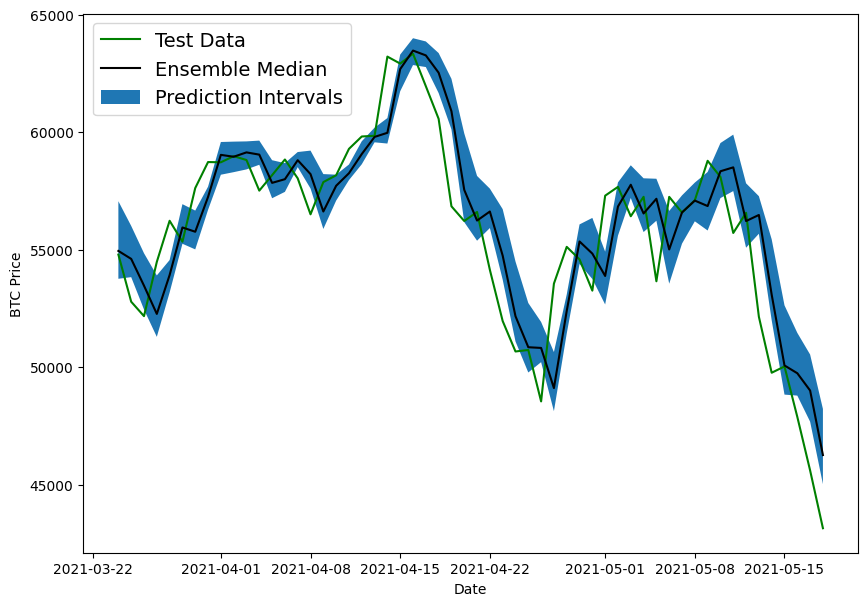

In [140]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_predictions, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

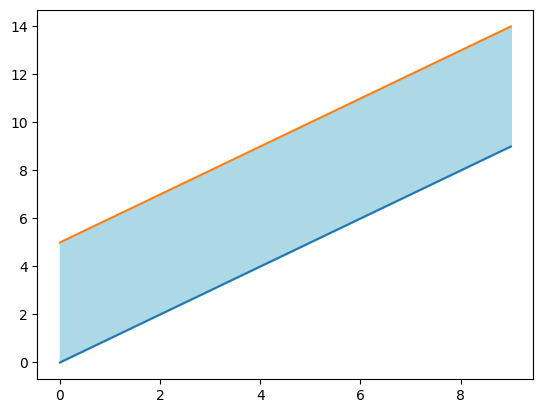

In [141]:
x = np.arange(10)
y1 = np.arange(10)
y2 = np.arange(10) + 5

plt.plot(x, y1)
plt.plot(x, y2)
plt.fill_between(x, y1, y2, color="lightblue")
plt.show()


# Model 9: Train a model on the full historical data to make fututre prediction

In [142]:
new_price_df.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [143]:
X_all=new_price_df.dropna().drop(["Price","block_reward"],axis=1).to_numpy()
y_all=new_price_df.dropna()["Price"].to_numpy()
X_all.shape, y_all.shape

((2780, 7), (2780,))

In [144]:
# convert the numpy to tensor
features_all=tf.data.Dataset.from_tensor_slices(X_all)
labels_all=tf.data.Dataset.from_tensor_slices(y_all)

dataset_all=tf.data.Dataset.zip((features_all,labels_all))

Batch_size=1024

dataset_all=dataset_all.batch(Batch_size).prefetch(tf.data.AUTOTUNE)
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [145]:
tf.random.set_seed(42)

model_9=tf.keras.Sequential([

                     layers.Dense(128,activation="relu"),
                     layers.Dense(128,activation="relu"),
                     layers.Dense(HORIZON)
],name="Model_9")

model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )
model_9.fit(dataset_all,
            epochs=1000,
            verbose=0)



In [146]:
# Make prediction into the future
FUTURE=14


In [160]:
def make_future_forecast(values,model,into_future,window_size=WINDOW)->list:
  future_forecast=[]
  last_window=values[-window_size:]
  for _ in range(into_future):
    future_pred=model.predict(tf.expand_dims(last_window,axis=0))
    print(f"predicting on: \n {last_window} -> prediction: {tf.squeeze(future_pred).numpy()}\n")
    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window=np.append(last_window,future_pred)[-window_size:]
  return future_forecast

In [161]:
future_forecast=make_future_forecast(values=y_all, model=model_9,into_future=FUTURE)
future_forecast

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> prediction: 56275.375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56275.375     ] -> prediction: 51561.02734375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56275.375      51561.02734375] -> prediction: 50313.58203125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56275.375      51561.02734375 50313.58203125] -> prediction: 49995.546875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 56275.375
 51561.02734375 50313.58203125 49995.546875  ] -> prediction: 46973.98828125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

[np.float32(56275.375),
 np.float32(51561.027),
 np.float32(50313.582),
 np.float32(49995.547),
 np.float32(46973.99),
 np.float32(45431.434),
 np.float32(45262.062),
 np.float32(55966.848),
 np.float32(51208.16),
 np.float32(50707.37),
 np.float32(49837.484),
 np.float32(46154.617),
 np.float32(45636.023),
 np.float32(47000.145)]

### Plot the Forecast


In [162]:
def get_future_dates(start_date,future,offset=1):
  start_date=start_date+np.timedelta64(offset,"D")
  end_date=start_date+np.timedelta64(future,"D")
  return np.arange(start_date,end_date,dtype="datetime64[D]")

In [163]:
# The start date of the forecast is the end date of the date
last_timesteps=new_price_df.index[-1]
last_timesteps

Timestamp('2021-05-18 00:00:00')

In [164]:
# get next two weeks of timesteps
future_timesteps=get_future_dates(start_date=last_timesteps,future=FUTURE)
future_timesteps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [165]:
# insert the last timesteps and final price to the start of array so the graph dont looked messed
future_timesteps=np.insert(future_timesteps,0,last_timesteps)
future_forecast=np.insert(future_forecast,0,prices[-1]) ## **
future_timesteps,future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 56275.375, 51561.027, 50313.582, 49995.547, 46973.99 ,
        45431.434, 45262.062, 55966.848, 51208.16 , 50707.37 , 49837.484,
        46154.617, 45636.023, 47000.145], dtype=float32))

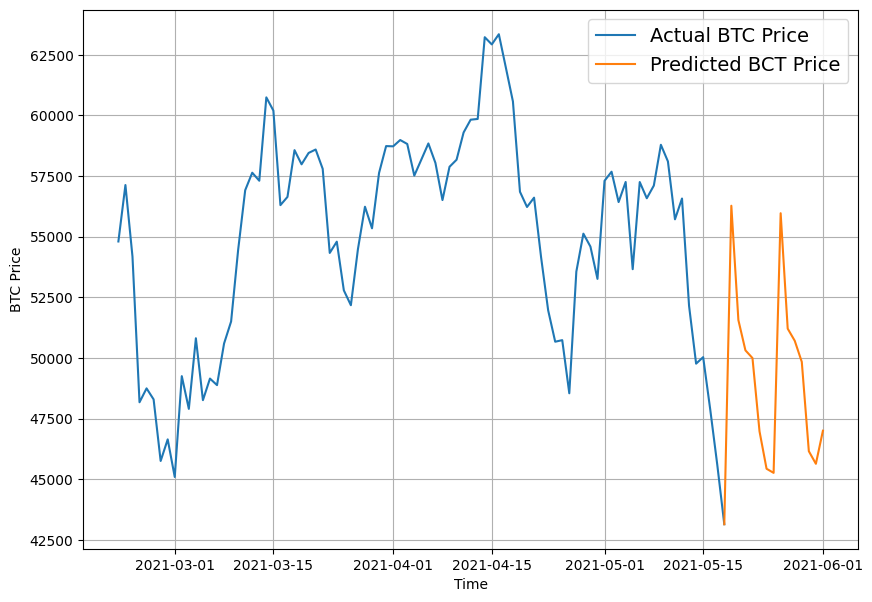

In [174]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps,prices,start=2700,format="-",label="Actual BTC Price")
plot_time_series(future_timesteps,future_forecast,format="-",label="Predicted BCT Price")